## Наша супер-команда:
- Семён Куприянов
- Анна Капитонова
- Татьяна Кикалова
- Юлия Руженкова

In [48]:
import pandas as pd
import seaborn as sns
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.preprocessing import StandardScaler

Будем учиться классифицировать жанры музыки. В отличие от проекта, который вас ждет, здесь мы будем работать не с сырыми данными (аудиодорожками), а уже в осмысленными признаками (правда, не все из них имеют понятные названия). Сами данные можно найти [здесь](https://www.kaggle.com/purumalgi/music-genre-classification). Будем использовать файл `train.csv`. Нашей задачей будет предсказание переменной `Class` (жанр песни) при помощи деревьев решений. Можно попробовать также другие методы классификации, которые мы прошли, и сравнить результаты. При обучении всех моделей не забывайте про разделение на тренировку и тест (или кросс валидацию [ссылка](https://www.youtube.com/watch?v=fSytzGwwBVw)).

### Задание 1. EDA (10 баллов)

Как обычно, начнем с того, что посмотрим на наши данные: типы переменных, пропущенные значения, баланс классов и все такое. Ваш ход:

In [3]:
data = pd.read_csv("train.csv")
data.head()

,Artist Name,Track Name,Popularity,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_in min/ms,time_signature,Class
0,Bruno Mars,That's What I Like (feat. Gucci Mane),60.0,0.854,0.564,1.0,-4.964,1,0.0485,0.017100,NaN,0.0849,0.8990,134.071,234596.0,4,5
1,Boston,Hitch a Ride,54.0,0.382,0.814,3.0,-7.230,1,0.0406,0.001100,0.004010,0.1010,0.5690,116.454,251733.0,4,10
2,The Raincoats,No Side to Fall In,35.0,0.434,0.614,6.0,-8.334,1,0.0525,0.486000,0.000196,0.3940,0.7870,147.681,109667.0,4,6
3,Deno,Lingo (feat. J.I & Chunkz),66.0,0.853,0.597,10.0,-6.528,0,0.0555,0.021200,NaN,0.1220,0.5690,107.033,173968.0,4,5
4,Red Hot Chili Peppers,Nobody Weird Like Me - Remastered,53.0,0.167,0.975,2.0,-4.279,1,0.2160,0.000169,0.016100,0.1720,0.0918,199.060,229960.0,4,10


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17996 entries, 0 to 17995
Data columns (total 17 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Artist Name         17996 non-null  object 
 1   Track Name          17996 non-null  object 
 2   Popularity          17568 non-null  float64
 3   danceability        17996 non-null  float64
 4   energy              17996 non-null  float64
 5   key                 15982 non-null  float64
 6   loudness            17996 non-null  float64
 7   mode                17996 non-null  int64  
 8   speechiness         17996 non-null  float64
 9   acousticness        17996 non-null  float64
 10  instrumentalness    13619 non-null  float64
 11  liveness            17996 non-null  float64
 12  valence             17996 non-null  float64
 13  tempo               17996 non-null  float64
 14  duration_in min/ms  17996 non-null  float64
 15  time_signature      17996 non-null  int64  
 16  Clas

In [5]:
data.isna().sum()

Artist Name              0
Track Name               0
Popularity             428
danceability             0
energy                   0
key                   2014
loudness                 0
mode                     0
speechiness              0
acousticness             0
instrumentalness      4377
liveness                 0
valence                  0
tempo                    0
duration_in min/ms       0
time_signature           0
Class                    0
dtype: int64

In [6]:
data.dropna(axis=0, how='any', inplace=True)

In [7]:
data.isna().sum()

Artist Name           0
Track Name            0
Popularity            0
danceability          0
energy                0
key                   0
loudness              0
mode                  0
speechiness           0
acousticness          0
instrumentalness      0
liveness              0
valence               0
tempo                 0
duration_in min/ms    0
time_signature        0
Class                 0
dtype: int64

In [8]:
data.describe()

,Popularity,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_in min/ms,time_signature,Class
count,11813.000000,11813.000000,11813.000000,11813.000000,11813.000000,11813.000000,11813.000000,11813.000000,11813.000000,11813.000000,11813.000000,11813.000000,1.181300e+04,11813.000000,11813.000000
mean,43.100652,0.524944,0.670305,5.972573,-8.215807,0.623974,0.071107,0.239968,0.178991,0.195096,0.470115,122.928641,2.129446e+05,3.913824,6.622619
std,16.568500,0.166013,0.242324,3.167348,4.239682,0.484407,0.067783,0.319142,0.303809,0.159743,0.244635,29.430883,1.158561e+05,0.381625,3.246656
min,1.000000,0.064400,0.000020,1.000000,-36.214000,0.000000,0.022500,0.000000,0.000001,0.011900,0.018300,30.557000,5.016500e-01,1.000000,0.000000
25%,32.000000,0.413000,0.513000,3.000000,-9.994000,0.000000,0.034600,0.001890,0.000096,0.096900,0.271000,100.001000,1.755330e+05,4.000000,5.000000
50%,42.000000,0.527000,0.716000,6.000000,-7.314000,1.000000,0.046300,0.056100,0.004290,0.127000,0.462000,120.046000,2.178830e+05,4.000000,8.000000
75%,54.000000,0.638000,0.875000,9.000000,-5.341000,1.000000,0.076500,0.421000,0.209000,0.256000,0.660000,141.877000,2.635870e+05,4.000000,10.000000
max,98.000000,0.989000,1.000000,11.000000,1.355000,1.000000,0.935000,0.996000,0.996000,0.992000,0.980000,217.416000,1.477187e+06,5.000000,10.000000


In [9]:
data['Artist Name'].value_counts()

The Rolling Stones                     30
Britney Spears                         29
AC/DC                                  26
U2                                     26
Hadag Nahash                           25
                                       ..
Rhythm Shaw                             1
Skeleton Lipstick                       1
Carl Bagge Trio                         1
Marcel Tournier, Magdalena Hoffmann     1
Beherit                                 1
Name: Artist Name, Length: 6703, dtype: int64

In [10]:
data['Track Name'].value_counts()

Fire                                8
Landslide                           6
Runaway                             6
Promise                             6
Forever                             5
                                   ..
I Got It Bad And That Ain't Good    1
Tamudre                             1
Kehna Hai Tumse                     1
Tar Hani (My Love)                  1
Broken Boy Soldier                  1
Name: Track Name, Length: 10002, dtype: int64

In [11]:
data['Class'].value_counts()

10    3374
6     2039
8     1523
9     1099
1     1037
2      956
5      517
7      464
0      386
3      270
4      148
Name: Class, dtype: int64

<AxesSubplot:>

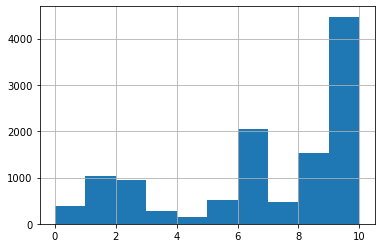

In [12]:
data['Class'].hist()

##### Достаточно сильный дисбаланс, но преимущество деревьев в том, что они хорошо справляются с дисбалансом

### Задание 2. Обучение дерева решений (10 баллов)

Предобработайте признаки так, чтобы их можно было подать в модель дерева решений и обучите ее, постарайтесь подобрать оптимальные гиперпараметры, которые вам известны. Постарайтесь также обосновать выбор метрики в данном случае. При подборе гиперпараметров может помочь `GridSearchCV` [ссылка](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html).

In [13]:
SEED = 111

In [14]:
y = data['Class']
X = data.drop(['Class', 'Artist Name', 'Track Name'], axis=1)

##### Мы убрали категориальные признаки, потому что имя артиста и название трека вряд ли будут значимыми признаками для предсказания музыкального класса

In [15]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=SEED)

<AxesSubplot:xlabel='Class', ylabel='Count'>

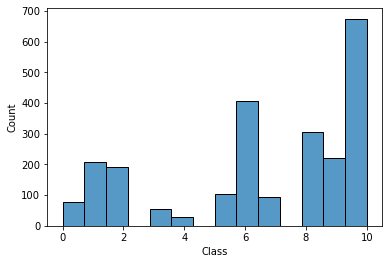

In [18]:
sns.histplot(y_test)

##### Классы не однородные, как и в общей выборке, поэтому accuracy плохая метрика для данного сета

##### Тут мы попробовали стандартизировать данные

In [25]:
stdscl = StandardScaler()
X_train = stdscl.fit_transform(X_train)
X_test = stdscl.transform(X_test)

Воспользуемся GridSearchCV для подбора оптимальных гиперпараметров:

In [26]:
dec_tree = DecisionTreeClassifier()
params = {'criterion': ["gini", "entropy"], 'splitter' : ["best", "random"], 'max_depth': range(1, 20)}
cv_tree = GridSearchCV(dec_tree, params)
cv_tree.fit(X_train, y_train)

GridSearchCV(estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': range(1, 20),
                         'splitter': ['best', 'random']})

In [27]:
cv_tree.best_params_

{'criterion': 'entropy', 'max_depth': 7, 'splitter': 'best'}

In [28]:
best_tree = cv_tree.best_estimator_
y_pred = best_tree.predict(X_test)

In [29]:
best_tree.score(X_test, y_test)

0.4638171815488785

In [31]:
f1_score(y_test, y_pred, average = 'macro')

0.4717892520786559

In [34]:
cross_val_score(best_tree, X_train, y_train, cv=5)

array([0.45502646, 0.45396825, 0.47195767, 0.44391534, 0.45343915])

Cкор, прямо скажем, не очень высокий :(

##### Теперь попробуем без стандартизации

In [35]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=SEED)

In [37]:
dec_tree = DecisionTreeClassifier()
params = {'criterion': ["gini", "entropy"], 'splitter' : ["best", "random"], 'max_depth': range(1, 20)}
cv_tree = GridSearchCV(dec_tree, params)
cv_tree.fit(X_train, y_train)

GridSearchCV(estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': range(1, 20),
                         'splitter': ['best', 'random']})

In [38]:
cv_tree.best_params_

{'criterion': 'entropy', 'max_depth': 7, 'splitter': 'best'}

Гиперпараметры лучшего дерева не изменились, хороший знак! :)

In [39]:
best_tree = cv_tree.best_estimator_
y_pred = best_tree.predict(X_test)
best_tree.score(X_test, y_test)

0.4638171815488785

In [40]:
f1_score(y_test, y_pred, average = 'macro')

0.4721523993481199

##### На этом random_state результат такой же, но до этого мы выполнили код без random_state и получилась небольшая разница между стандартизацией и без нее в пользу стандартизации: 0.47 против 0.44, что не критично. Таким образом, сильно стандартизация влиять не будет.

### Задание 3. Другие модели (5 баллов за модель)

Проделайте операции из **Задания 2** с другими известными вам классификаторами. Стало ли лучше?

##### Попробуем k-NN

In [42]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=SEED)
stdscl = StandardScaler()
X_train = stdscl.fit_transform(X_train)
X_test = stdscl.transform(X_test)

In [69]:
knn = KNeighborsRegressor()
params = {'n_neighbors': [2, 3, 5, 10, 15, 20], 'weights' : ["uniform", "distance"], 'p': [1, 2]}
cv_knn = GridSearchCV(knn, params)
cv_knn.fit(X_train, y_train)

GridSearchCV(estimator=KNeighborsRegressor(),
             param_grid={'n_neighbors': [2, 3, 5, 10, 15, 20], 'p': [1, 2],
                         'weights': ['uniform', 'distance']})

In [70]:
cv_knn.best_params_

{'n_neighbors': 20, 'p': 1, 'weights': 'uniform'}

In [71]:
best_knn = cv_knn.best_estimator_
y_pred = best_knn.predict(X_test)
best_knn.score(X_test, y_test)

0.18878889226668782

##### Тут вроде все получается, но predict выдает float, хотя по идее, не должен, без понятия, в чем причина

##### Округляем результаты предсказания

In [73]:
y_pred = list(map(round, y_pred))
accuracy_score(y_test, y_pred)

0.17774016081252644

In [74]:
f1_score(y_test, y_pred, average = 'macro')

0.12424950202587044

##### Результат не очень хороший

Задача, судя по всему, неоднозначная и сложная для классификации по данным фичам, но дерево лучше справляется.

### Задание 4. (3 балла)

Раз уж вы работаете в командах, то у вас есть шанс обсудить любимые фильмы. Напишите сюда 3 фильма, которые хотели бы посмотреть вместе:

1. Общество мёртвых поэтов

2. Меланхолия

3. Шестиструнный самурай

4.